In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np


In [13]:
data = pd.read_csv(r"C:\Users\CHARAN\Downloads\50_Startups.csv")

In [14]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
 4   State_Florida    50 non-null     bool   
 5   State_New York   50 non-null     bool   
dtypes: bool(2), float64(4)
memory usage: 1.8 KB


In [17]:
print(data.columns)

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')


In [21]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,0.116244,0.031368
State_Florida,0.105711,0.010493,0.205685,0.116244,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.492366,1.000000


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\CHARAN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


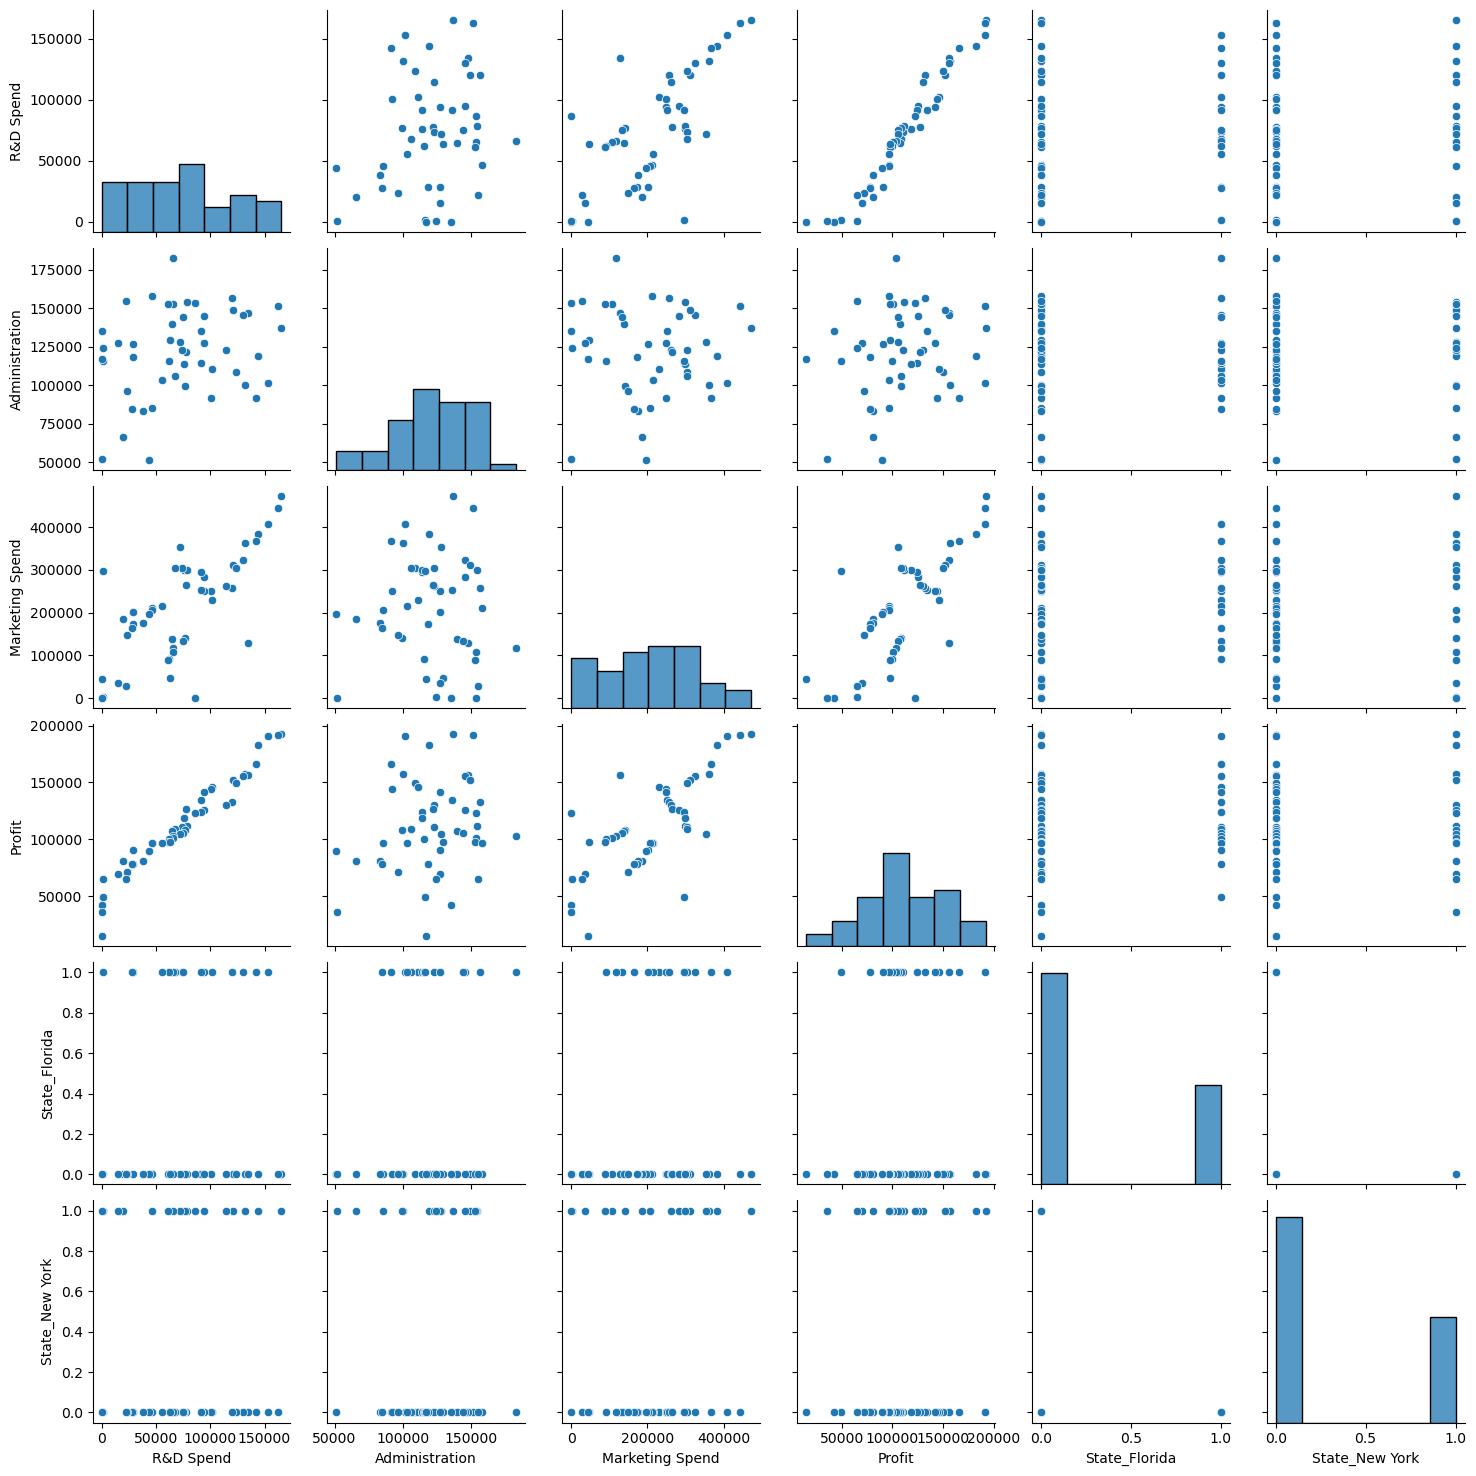

In [25]:
sns.pairplot(data)

In [27]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
State_Florida      0
State_New York     0
dtype: int64

In [36]:
rd=data['R&D Spend']
mp=data['Marketing Spend']

In [38]:
import statsmodels.formula.api as smf
model =smf.ols("Profit~mp+rd+Administration",data=data).fit()

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 16 Feb 2024   Prob (F-statistic):           4.53e-30
Time:                        13:36:29   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
mp                 0.0272      0.016      1.655      0.105      -0.006       0.060
rd                 0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
model.resid.mean()

1.586158759891987e-11

In [45]:
model.resid_pearson

array([-0.02809938,  0.28544153,  0.96434012,  0.99707064, -0.64464453,
       -0.71375884, -0.21571863, -0.46237091,  0.05091565, -0.5550843 ,
        1.14953951,  0.94078986,  1.34824679,  0.73863854, -1.83550495,
       -1.76749655,  1.0915467 , -0.52230311, -0.51420652,  0.77354686,
        0.19868872, -0.65058642, -0.4716826 , -0.1367612 , -0.52109528,
        0.5596217 , -0.52717275, -1.01813481,  0.17572521, -0.08560602,
        0.05255627, -0.02212834, -0.1704324 , -0.12305531,  0.83115771,
        0.64641399,  1.67043502,  0.03570086,  1.249048  , -0.29496894,
        0.37086567,  0.32454128,  0.095109  ,  1.03895062,  0.06379481,
        1.87118758, -0.72305186, -0.42577084, -1.462033  , -3.63220515])

In [46]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

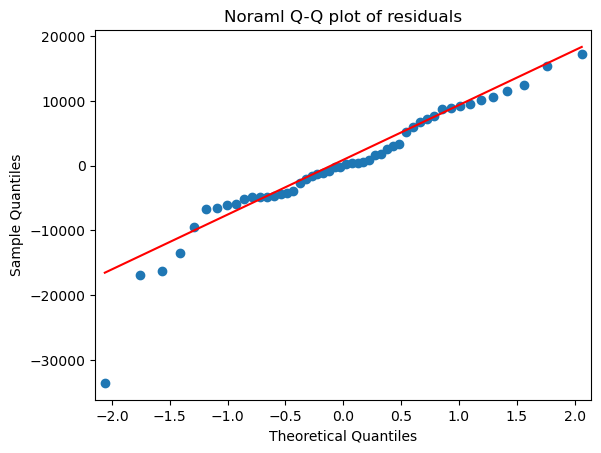

In [52]:
import statsmodels.api  as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Noraml Q-Q plot of residuals")
plt.show()